# Отток клиентов

## Подготовка данных

In [1]:
# импорт библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
# чтение файла с данными и сохранение в df с использованием конструкции try-except
try:
    df = pd.read_csv('C:/Users/datasets/Churn.csv')  # локальный путь
except:
    df = pd.read_csv('/datasets/Churn.csv')  # серверный путь

In [3]:
# просмотр первых 5 строк таблицы df
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Таблица содержить 14 колонок и 10000 строк. В каждой строке содержиться информация о поведении клиентов и расторжении договоров с банком. В столбце `Tenure ` имеются пропуски. Заполним их.

In [5]:
# просмотр уникальных значений столбца Tenure
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [6]:
# просмотр строк с пропусками в столбце Tenure
df.query('Tenure=="nan"')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Угадать, сколько лет человек является клиентом банка, мы не можем, кроме того значение 0 имеется среди уникальных значений столбца `Tenure`. Заполним пропуски, например, значением -1.

In [7]:
# заполнение пропусков
df['Tenure'] = df['Tenure'].fillna(-1)
df.isna().sum() # проверка

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Столбцы `RowNumber`, `CustomerId`, `Surname` по сути дублируют одну и ту же информацию, плюс информация, содержащаяся в них, не несет пользы для обучения модели. Поэтому данные столбцы можно спокойно удалить.

In [8]:
# удаление столбцов
list_drop = ['RowNumber', 'CustomerId', 'Surname']
data = df.drop(list_drop, axis=1)
data.columns # проверка

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

В дата сете есть категориальные признаки, чтобы перевести их в численные, воспользуемся методом One Hot Encoding.

In [9]:
# применение One Hot Encoding
data = pd.get_dummies(data, drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Так как значения и их разброс в столбцах датасета совершенно разные, а признаки имеют одинаковую значимость, приведем их к одному масштабу. Для стандартизации данных будем использовать `StandardScaler`, но перед этим разделим наши данные на обучающую, валидационную и тестовую выборки.

In [10]:
# создание переменных с признакими и целевым признаком
features = data.drop('Exited', axis=1)
target = data['Exited']

In [11]:
# разделение данных на обучающую, валидационную и тестовую выборки
features_train, features_test_val, target_train, target_test_val = (
    train_test_split(features, target, test_size=0.4, random_state=12345)) # разделям на обучающую и на проверочную выборки
features_valid, features_test, target_valid, target_test = (
    train_test_split(features_test_val, target_test_val, test_size=0.5, random_state=12345)) # проверочную делим на валидационную и тестовую

In [12]:
# проверка размеров полученных наборов
sets = [features_train, target_train, features_valid, target_valid, features_test, target_test]
for elem in sets:
    print(elem.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


In [13]:
# создание списка с численными переменными
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [14]:
# стандартизация численных признаков тренировочной, валидационной и тестовой выборок
pd.options.mode.chained_assignment = None

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_train.head() # просмотр преобразованный данных тренировочной выбрки

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.083651,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.083651,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.452862,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.469046,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-0.760164,1.140475,-0.891560,0,0,1.524268,1,0,0


In [15]:
# просмотр преобразованный данных валидационной выбрки
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,-0.699824,-0.373192,-0.760164,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.452862,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.374769,0.438711,-0.891560,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.698257,1.239884,-0.891560,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.698257,-1.233163,0.830152,1,0,1.358533,0,1,1


In [16]:
# просмотр преобразованный данных тестовой выбрки
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-0.760164,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.390954,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,0.161744,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.698257,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.698257,0.615625,-0.891560,0,1,-1.070919,0,0,1


**Вывод**

Таким образом, была проведена подготовка данных, в результате которой были удалены столбцы, не имеющие ценности для обучения модели, к категориальным признакам был применен метод OHE, а так же стандартизированы численные признаки.

## Исследование задачи

Обучим три модели: дерево решений, случайный лес и логистическая регрессия, а так же посчитаем `accuracy` для каждой из модели.

In [17]:
models = [DecisionTreeClassifier(random_state=12345), RandomForestClassifier(random_state=12345), LogisticRegression(solver = 'liblinear', random_state=12345)]
for model in models: 
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    accuracy_valid = accuracy_score(target_valid, predicted_valid)
    print(accuracy_valid)

0.7875
0.85
0.8025


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Самая высокая точность получилась у модели случайного леса (0.85).

Проверим адекватность модели. Для начала проверим, как часто в целевом признаке встречается класс «1» или «0».

0    0.800667
1    0.199333
Name: Exited, dtype: float64


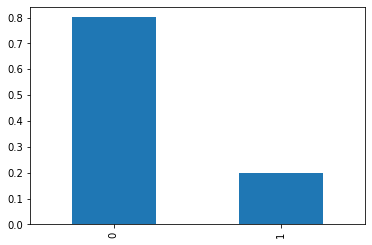

In [18]:
# подсчёт частоты классов в целевом признаке тренировочной выборки
class_frequency = target_train.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

0    0.791
1    0.209
Name: Exited, dtype: float64


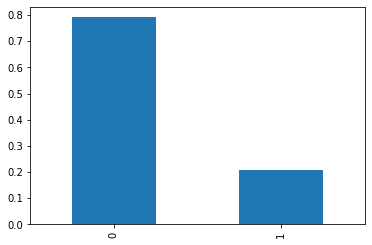

In [19]:
# подсчёт частоты классов в целевом признаке валидационнойии выборки
class_frequency = target_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

На лицо дисбаланс классов: около 80% ответов приходятся на класс «0» и 20% на класс «1». о есть с большой вероятностью модель будет предсказывать класс «0».

Создадим константную модель, которая любому объекту прогнозирует класс «0» и сравним качество предсказаний.

In [20]:
# создание константной модели
target_pred_constant = pd.Series([0]*len(target))
accuracy_score(target, target_pred_constant)

0.7963

Качество констанстной модели практически такое же как у моделей дерева решений, случайного леса и логистической регрессии. Другими словами, если модель каждому объекту будет предсказывать класс «0», то доля правильных ответов будет такая же как у наших моделей. Скорее всего, причина тому дисбаланс классов.

Рассчитаем матрицу ошибок функцией `confusion_matrix()` для каждой модели, а так же найдем значения полноты, точности и F1-меры.

In [21]:
# матрица ошибок для дерева решений
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
confusion_matrix(target_valid, predicted_valid)

array([[1375,  207],
       [ 218,  200]])

In [22]:
# полнота, точность и F1-мера для дерева решений
print('Полнота', recall_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('F1-мера', f1_score(target_valid, predicted_valid))

Полнота 0.4784688995215311
Точность 0.4914004914004914
F1-мера 0.48484848484848486


Полученные значения метрик говорит о том, что качество модели достаточно низкое.

Теперь рассчитаем матрицу ошибок и значение метрик для случайного леса.

In [23]:
# матрица ошибок для случайного леса
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
confusion_matrix(target_valid, predicted_valid)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[1516,   66],
       [ 234,  184]])

In [24]:
# полнота, точность, F1-мера для случайного леса
print('Полнота', recall_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('F1-мера', f1_score(target_valid, predicted_valid))

Полнота 0.44019138755980863
Точность 0.736
F1-мера 0.5508982035928144


Модель выдает больше правильных ответов, чем случайный лес (точность модели выше на 0.24), однако качество модели остается достаточно низким.

In [25]:
# матрица ошибок для логистической регрессии
model = LogisticRegression(solver = 'liblinear', random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
confusion_matrix(target_valid, predicted_valid)

array([[1506,   76],
       [ 319,   99]])

In [26]:
# полнота, точность, F1-мера для случайного леса
print('Полнота', recall_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('F1-мера', f1_score(target_valid, predicted_valid))

Полнота 0.23684210526315788
Точность 0.5657142857142857
F1-мера 0.33389544688026984


Логистическая регрессия показала самое низкое качество.

Для логистической регрессии рассчитаем AUC-ROC и построим ROC-кривую.

0.7585576975423272


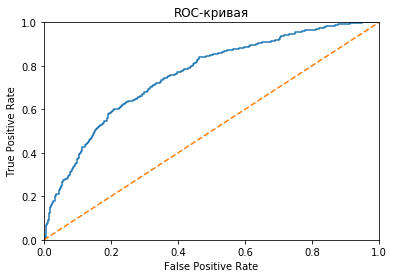

In [27]:
# AUC-ROC и ROC-кривая для логистической регрессии 
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid) # рассчет вероятности классов
probabilities_one_valid = probabilities_valid[:, 1] # вероятность класса "1"
auc_roc = roc_auc_score(target_valid, probabilities_one_valid) # метрика AUC-ROC
print(auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) # кривая ошибок
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

## Борьба с дисбалансом

Для устранения дисбаланса классов воспользуемся техникой upsampling. Так как соотношение класов примерно 80% и 20%, то для баланса необходимо долю класса 1 увеличить в 4 раза.

In [28]:
# создание функции для увеличения выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0] # признаки объектов с ответом «0»
    features_ones = features[target == 1] # признаки объектов с ответом «1»
    target_zeros = target[target == 0] # целевой признак объектов, у которых ответы только «0»
    target_ones = target[target == 1] # целевой признак объектов, у которых ответы только «1»

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) # дублирование объектов положительного класса 
                                                                            # и объединение их с объектами отрицательного класса
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat) 
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345) # перемешивание данных
    
    return features_upsampled, target_upsampled

In [29]:
# вызов функции для обучающих данных
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 11)
(9588,)


Таким образом, мы получили сбалансированные классы.

Рассчитаем значение F1-меры для каждой модели на новых данных.

In [30]:
# F1-score на сбалансированных данных
models = [DecisionTreeClassifier(random_state=12345), RandomForestClassifier(random_state=12345), LogisticRegression(solver = 'liblinear', random_state=12345)]
for model in models: 
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1_score_valid = f1_score(target_valid, predicted_valid)
    print(f1_score_valid)

0.4619164619164619
0.5989304812834225
0.4875962360992301


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Самое большое значение F1-меры показала модель случайного леса, попробуем улучшить качество модели, изменив параметры.

In [31]:
best_model = None
best_result = 0
best_depth = 0
best_est = 0
for est in range(10, 100, 10): 
    for depth in range(1,15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est,  max_depth=depth) 
        model.fit(features_upsampled, target_upsampled) 
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions)  
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
print('F1-score наилучшей модели на валидационной выборке:', best_result, ',', 'n_estimators =', best_est, ',', 'max_depth =', best_depth)

F1-score наилучшей модели на валидационной выборке: 0.624277456647399 , n_estimators = 80 , max_depth = 12


Посчитаем для модели с данными параметрами все метрики качества.

In [32]:
# полнота, точность, F1-мера и AUC-ROC для лучшей модели
model = RandomForestClassifier(random_state=12345, n_estimators=80,  max_depth=12) 
model.fit(features_upsampled, target_upsampled) 
predicted_valid = model.predict(features_valid)
print('Полнота', recall_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('F1-мера', f1_score(target_valid, predicted_valid))
print('AUC-ROC', roc_auc_score(target_valid, predicted_valid))

Полнота 0.645933014354067
Точность 0.6040268456375839
F1-мера 0.624277456647399
AUC-ROC 0.767024661412179


Теперь попробуем убрать дисбаланс классов, воспользовшись методом ` downsampling `.

In [33]:
# создание функции для уменьшения выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [34]:
# вызов функции для обучающих данных
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.4)
print(features_downsampled.shape)
print(target_downsampled.shape)

(3118, 11)
(3118,)


In [35]:
# F1-score на сбалансированных данных для лучшей модели
model = RandomForestClassifier(random_state=12345, n_estimators=80,  max_depth=12) 
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6244343891402715


Таким образом, наилучшей моделью оказалась RandomForestClassifier с количеством деревьев равным 22 и глубиной 12. При таких параметрах значение F1-меры достигает 0.62, что вышего целевого значения.

## Тестирование модели

In [36]:
# проверка качества RandomForestClassifier на тестовой выборке
model = RandomForestClassifier(random_state=12345, n_estimators=80,  max_depth=12)
model.fit(features_upsampled, target_upsampled)
predictions_test = model.predict(features_test) # получаем предсказания модели на тестовой выборке
print('Полнота', recall_score(target_test, predictions_test))
print('Точность', precision_score(target_test, predictions_test))
print('F1-мера', f1_score(target_test, predictions_test))

Полнота 0.6099290780141844
Точность 0.5958429561200924
F1-мера 0.602803738317757


0.8464619916645999


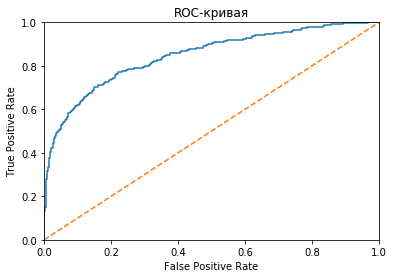

In [37]:
# AUC-ROC и ROC-кривая для лучшей модели
model = RandomForestClassifier(random_state=12345, n_estimators=80,  max_depth=12)
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid) # рассчет вероятности классов
probabilities_one_valid = probabilities_valid[:, 1] # вероятность класса "1"
auc_roc = roc_auc_score(target_valid, probabilities_one_valid) # метрика AUC-ROC
print(auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) # кривая ошибок
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Рассчитав метрики качества на тестовой выборке, мы видим, что значения немного снизились. Если F1-score на валидационной выборке показал значение 0.62, то на тестовой выборке это значение равно 0.6. Значение метрики AUC-ROCдля лучшей модели - 0.85.